In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("madrid_spain_clean.csv")
nullValues = data.isnull().sum()


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    26980 non-null  int64  
 1   id                            26980 non-null  int64  
 2   last_scraped                  26980 non-null  object 
 3   source                        26980 non-null  object 
 4   name                          26980 non-null  object 
 5   description                   26980 non-null  object 
 6   neighborhood_overview         26980 non-null  object 
 7   host_name                     26980 non-null  object 
 8   host_since                    26980 non-null  object 
 9   host_location                 26980 non-null  object 
 10  host_about                    26980 non-null  object 
 11  host_response_time            26980 non-null  object 
 12  host_response_rate            26980 non-null  object 
 13  h

In [26]:
cuantitativas = data.iloc[:, [15, 16, 26, 28, 29] + list(range(32, 42)) + [44, 48, 50]]
cualitativas = data.iloc[:, list(range(0, 15)) + list(range(17, 26)) + [27, 30, 31, 42, 43] + list(range(45, 48)) + [49]]

In [ ]:
cualitativas.info()

In [27]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_listings_count        26980 non-null  float64
 1   host_total_listings_count  26980 non-null  float64
 2   bathrooms                  26980 non-null  float64
 3   bedrooms                   26980 non-null  float64
 4   beds                       26980 non-null  float64
 5   minimum_nights             26980 non-null  int64  
 6   maximum_nights             26980 non-null  int64  
 7   minimum_nights_avg_ntm     26980 non-null  float64
 8   maximum_nights_avg_ntm     26980 non-null  float64
 9   availability_30            26980 non-null  int64  
 10  availability_60            26980 non-null  int64  
 11  availability_90            26980 non-null  int64  
 12  availability_365           26980 non-null  int64  
 13  number_of_reviews          26980 non-null  int

<Figure size 1500x800 with 0 Axes>

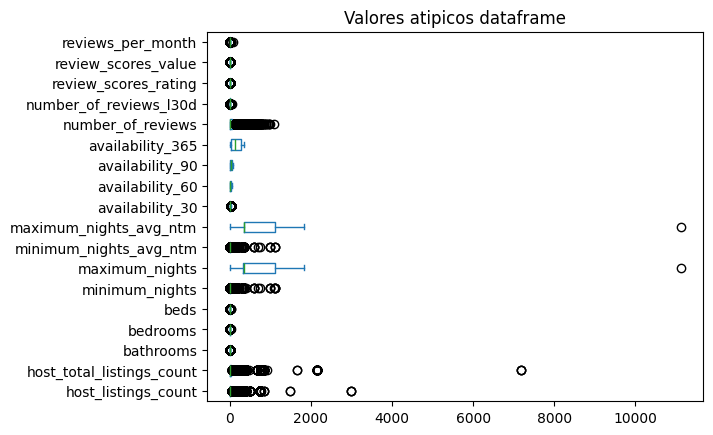

In [28]:
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores atipicos dataframe")
plt.show()

Desviacion estandar

In [29]:
#Utilizando desviación estandar
y = cuantitativas
limiteSuperior = y.mean() + 3*y.std()
limiteInferior = y.mean() - 3*y.std()
print("------------Limite superior permitido------------ \n", limiteSuperior)
print("------------Limite inferior permitido------------ \n", limiteInferior)


------------Limite superior permitido------------ 
 host_listings_count           391.086371
host_total_listings_count     544.072504
bathrooms                       3.062852
bedrooms                        4.211297
beds                            5.932136
minimum_nights                100.541657
maximum_nights               1830.892075
minimum_nights_avg_ntm         97.378337
maximum_nights_avg_ntm       1970.779937
availability_30                34.305248
availability_60                78.960497
availability_90               129.578882
availability_365              542.001478
number_of_reviews             305.361944
number_of_reviews_l30d          6.060613
review_scores_rating            5.938461
review_scores_value             5.918246
reviews_per_month               7.141442
dtype: float64
------------Limite inferior permitido------------ 
 host_listings_count         -305.232576
host_total_listings_count   -438.262148
bathrooms                     -0.467189
bedrooms               

In [30]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data3 = cuantitativas[(y<=limiteSuperior) & (y>=limiteInferior)]

In [34]:
valoresNulos = data3.isnull().sum()
valoresNulos

host_listings_count          431
host_total_listings_count    431
bathrooms                    322
bedrooms                     277
beds                         528
minimum_nights               190
maximum_nights                 1
minimum_nights_avg_ntm       199
maximum_nights_avg_ntm         1
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews            669
number_of_reviews_l30d       413
review_scores_rating         499
review_scores_value          584
reviews_per_month            456
dtype: int64

In [35]:
# Haciendo una copia y rellenando  los valores nulos
dataClean = data3.copy()
dataClean = dataClean.fillna(round(data3.mean(), 1))
dataClean

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_value,reviews_per_month
0,1.0,4.0,1.3,1.0,2.0,6.2,365.0,7.3,365.0,29,59,89,89,0.0,0.0,4.70,4.60,1.80
1,49.0,70.0,1.3,1.4,2.0,5.0,365.0,5.0,365.0,0,0,0,0,0.0,0.0,4.70,4.60,1.80
2,1.0,1.0,1.3,1.4,2.0,2.0,1125.0,2.0,1125.0,0,0,0,0,0.0,0.0,4.70,4.60,1.80
3,1.0,1.0,1.3,2.0,2.0,3.0,3.0,3.0,3.0,0,0,0,0,0.0,0.0,4.70,4.60,1.80
4,1.0,1.0,1.3,1.4,2.0,1.0,4.0,1.9,4.0,0,0,0,0,0.0,0.0,4.70,4.60,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26975,1.0,1.0,2.0,2.0,3.0,1.0,1125.0,1.0,1125.0,30,60,90,180,0.0,0.0,4.70,4.60,1.80
26976,3.0,6.0,1.0,1.0,1.0,1.0,365.0,1.3,365.0,15,45,75,350,4.0,2.0,5.00,5.00,1.79
26977,1.0,1.0,1.0,1.0,1.0,2.0,365.0,2.0,365.0,7,21,49,126,0.0,0.0,4.70,4.60,1.80
26978,18.0,31.0,1.0,1.0,2.0,7.0,180.0,7.0,180.0,30,60,90,365,3.0,0.0,5.00,4.33,0.08


In [36]:
valoresNulos = dataClean.isnull().sum()
valoresNulos

host_listings_count          0
host_total_listings_count    0
bathrooms                    0
bedrooms                     0
beds                         0
minimum_nights               0
maximum_nights               0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            0
number_of_reviews_l30d       0
review_scores_rating         0
review_scores_value          0
reviews_per_month            0
dtype: int64

Utilizando Cuantiles para sustitución de valores en el dataframe

In [37]:
#Metodo aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75

percentile25 = y.quantile(0.25) #q1
percentile75 = y.quantile(0.75) #q3
iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5*iqr
limiteInferiorIQR = percentile25 - 1.5*iqr
print("Limite superior permitido", limiteSuperiorIQR)
print("Limite inferior permitido", limiteInferiorIQR)

Limite superior permitido host_listings_count            51.000
host_total_listings_count      67.000
bathrooms                       1.750
bedrooms                        3.500
beds                            3.500
minimum_nights                  6.000
maximum_nights               2317.500
minimum_nights_avg_ntm         10.850
maximum_nights_avg_ntm       2265.000
availability_30                27.500
availability_60                87.500
availability_90               157.500
availability_365              651.000
number_of_reviews             121.000
number_of_reviews_l30d          2.500
review_scores_rating            5.255
review_scores_value             5.220
reviews_per_month               4.460
dtype: float64
Limite inferior permitido host_listings_count          -29.000
host_total_listings_count    -37.000
bathrooms                      0.550
bedrooms                      -0.500
beds                          -0.500
minimum_nights                -2.000
maximum_nights             

In [38]:
#Obtenemos datos limpios del dataframe
data3_iqr = cuantitativas[(y<=limiteSuperiorIQR)&(y>=limiteInferiorIQR)]
data3_iqr

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_value,reviews_per_month
0,1.0,4.0,1.3,1.0,2.0,NaN,365.0,NaN,365.0,NaN,59,89,89,0.0,0.0,4.70,4.60,1.80
1,49.0,NaN,1.3,1.4,2.0,5.0,365.0,5.0,365.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
2,1.0,1.0,1.3,1.4,2.0,2.0,1125.0,2.0,1125.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
3,1.0,1.0,1.3,2.0,2.0,3.0,3.0,3.0,3.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
4,1.0,1.0,1.3,1.4,2.0,1.0,4.0,1.9,4.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26975,1.0,1.0,NaN,2.0,3.0,1.0,1125.0,1.0,1125.0,NaN,60,90,180,0.0,0.0,4.70,4.60,1.80
26976,3.0,6.0,1.0,1.0,1.0,1.0,365.0,1.3,365.0,15.0,45,75,350,4.0,2.0,5.00,5.00,1.79
26977,1.0,1.0,1.0,1.0,1.0,2.0,365.0,2.0,365.0,7.0,21,49,126,0.0,0.0,4.70,4.60,1.80
26978,18.0,31.0,1.0,1.0,2.0,NaN,180.0,7.0,180.0,NaN,60,90,365,3.0,0.0,5.00,4.33,0.08


In [39]:
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

host_listings_count          4564
host_total_listings_count    4542
bathrooms                    4933
bedrooms                      724
beds                         2387
minimum_nights               4696
maximum_nights                  1
minimum_nights_avg_ntm       4377
maximum_nights_avg_ntm          1
availability_30              1816
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews            3031
number_of_reviews_l30d       3269
review_scores_rating         2312
review_scores_value          2303
reviews_per_month            1899
dtype: int64

In [40]:
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_listings_count,host_total_listings_count,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_value,reviews_per_month
0,1.0,4.0,1.3,1.0,2.0,1.8,365.0,2.6,365.0,5.7,59,89,89,0.0,0.0,4.70,4.60,1.80
1,49.0,8.8,1.3,1.4,2.0,5.0,365.0,5.0,365.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
2,1.0,1.0,1.3,1.4,2.0,2.0,1125.0,2.0,1125.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
3,1.0,1.0,1.3,2.0,2.0,3.0,3.0,3.0,3.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
4,1.0,1.0,1.3,1.4,2.0,1.0,4.0,1.9,4.0,0.0,0,0,0,0.0,0.0,4.70,4.60,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26975,1.0,1.0,1.1,2.0,3.0,1.0,1125.0,1.0,1125.0,5.7,60,90,180,0.0,0.0,4.70,4.60,1.80
26976,3.0,6.0,1.0,1.0,1.0,1.0,365.0,1.3,365.0,15.0,45,75,350,4.0,2.0,5.00,5.00,1.79
26977,1.0,1.0,1.0,1.0,1.0,2.0,365.0,2.0,365.0,7.0,21,49,126,0.0,0.0,4.70,4.60,1.80
26978,18.0,31.0,1.0,1.0,2.0,1.8,180.0,7.0,180.0,5.7,60,90,365,3.0,0.0,5.00,4.33,0.08


In [41]:
valores_nulos = data4_iqr.isnull().sum()
valores_nulos

host_listings_count          0
host_total_listings_count    0
bathrooms                    0
bedrooms                     0
beds                         0
minimum_nights               0
maximum_nights               0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            0
number_of_reviews_l30d       0
review_scores_rating         0
review_scores_value          0
reviews_per_month            0
dtype: int64

In [45]:
#Unir el dataframe cuantitativo limpio con el dataframe cualitativo

datos_Limpios = pd.concat([cualitativas, data4_iqr], axis=1)
datos_Limpios = datos_Limpios.drop('Unnamed: 0', axis=1)
datos_Limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26980 entries, 0 to 26979
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            26980 non-null  int64  
 1   last_scraped                  26980 non-null  object 
 2   source                        26980 non-null  object 
 3   name                          26980 non-null  object 
 4   description                   26980 non-null  object 
 5   neighborhood_overview         26980 non-null  object 
 6   host_name                     26980 non-null  object 
 7   host_since                    26980 non-null  object 
 8   host_location                 26980 non-null  object 
 9   host_about                    26980 non-null  object 
 10  host_response_time            26980 non-null  object 
 11  host_response_rate            26980 non-null  object 
 12  host_acceptance_rate          26980 non-null  object 
 13  h

In [46]:
datos_Limpios.to_csv("madrid_spain_Cleansed.csv")